In [109]:
#Importing Libraries
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [110]:
# converting the output categorical variabel to (-1 and 1)
def f(s):
    
    if(s==0):
        return -1
    else:
        return 1

In [111]:
# Run the data 
def run():
    data = pd.read_csv("train (1).data", delimiter=",",header=None)
    data.drop(data.columns[[1,3,5,6,7,8,9,13]], axis=1, inplace=True)
    data.columns=[0,1,2,3,4,5,6]
    le = preprocessing.LabelEncoder()
    le.fit(data.iloc[:,6])
    data.iloc[:,6]=le.transform(data.iloc[:,6])
    data.iloc[:,6]=data.iloc[:,6].apply(f)
    X=data.iloc[:,0:6].values
    Y=data.iloc[:,6].values
    return X,Y



In [112]:
X,Y=run()

X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1, random_state=0)
scaler=preprocessing.StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [113]:
# Prediction Function

def predict(a,b,X_test):
    z=np.zeros((len(X_test),1))
    for i in range(len(X_test)):
        if((np.dot(a,X_test[i].T)+b)>=0):
            z[i]=1
        else:
            
            z[i]=-1 
    return z

In [114]:

# Function to start the gradient with certain parameteres

def start_gradient(X_train,y_train,regularization_constant_1,X_test):
    data=np.concatenate((X_train,y_train.reshape((y_train.shape[0],1))), axis=1)
    learning_rate = 0.001
    num_epochs = 50
    steps=300
    regularization_constant=regularization_constant_1
    a, b,accuracy_held,magnitude_vector = gd(data, learning_rate, num_epochs,regularization_constant,steps)
    #cost_1=cost(data, a, b,regularization_constant)
    X_test=scaler.transform(X_test)
    Y_pred=predict(a,b,X_test)
    accuracy=accuracy_score(y_test,Y_pred)


    return(a,b,accuracy,accuracy_held,magnitude_vector)
    

In [115]:

# Determine the cost of support vector Machine

def cost(points, a, b,regularization_constant):
    total_cost = 0
    M = len(points)
    for i in range(M):
        x = points[i,0:6]
        y = points[i,6]
        total_cost += (max(0,1-y*((np.dot(a,x.T))+b)))
    return (total_cost/M)+((regularization_constant/2)*(np.dot(a,a.T)))

In [116]:
# Do the step gradient 

def step_gradient(data, learning_rate, a , b,steps,regularization_constant,accuracy_held,magnitude_Vector):
 #Gradient calculation   
    
    data=shuffle(data,random_state=0)
    # shuffle the Data
    held=data[0:50,:]
    held_test=held[:,0:6]
    
    M = len(data)
    size_of_batch=M//steps
    #size of each batch
    k=0
    for i in range(steps):
    # loop will be executed 300 times(number of steps)
          
        for j in range(size_of_batch*i,size_of_batch*(i+1)):
        
          a_slope = np.zeros((1,data.shape[1]-1))
          b_slope = 0
           
          x = data[j,0:6]
          y = data[j,6]
          
          if ((y*(np.dot(a,x.T)+b))>=1):
             a_slope=a_slope+(regularization_constant*a)
             b_slope += 0
          else:
             a_slope+=(regularization_constant*a)-(y*x)
             b_slope +=-y
            
        if(i>=29 and (i+1)%30==0):
            
             
             Y_pred=predict(a,b,held_test)
             accuracy_held.append(accuracy_score(held[:,6],Y_pred))
             magnitude_Vector.append(np.linalg.norm(a))
                        
        
             
        a = a - learning_rate*a_slope
        b = b - learning_rate*b_slope
    
    return a, b,accuracy_held,magnitude_Vector

    # for each step returning (weight vector (a), b (bias term),
    #accuracy of held out data after every 30 steps),magnitude of weight vector after every 30 steps

In [117]:

# perform the garadient for the whole dataset

def gd(data,learning_rate,num_epochs,regularization_constant,steps):
    a =np.zeros((1,data.shape[1]-1))
    b =0
    accuracy_held=[]
    magnitude_Vector=[]
    for i in range(num_epochs):
        a, b,accuracy_held,magnitude_vector_1= step_gradient(data, learning_rate, a , b,steps,regularization_constant,accuracy_held,magnitude_Vector)
        learning_rate=learning_rate-(0.01*learning_rate)
    return(a,b,accuracy_held,magnitude_vector_1)

In [118]:
regularization_constant=[1e-3, 1e-2, 1e-1, 1]
accuracy_held_list=[]
magnitude_vector_list=[]
for i in range(len(regularization_constant)):

  a,b,accuraccy,accuracy_held,magnitude_vector=start_gradient(X_train,y_train,regularization_constant[i],X_test)
  accuracy_held_list.append(accuracy_held)
  magnitude_vector_list.append(magnitude_vector)
  print("The weight vector: ",a,"The intercept term :",b)
  print("Accuracy :",accuraccy)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The weight vector:  [[0.26596458 0.04001973 0.40347515 0.61326283 0.2637261  0.2372595 ]] The intercept term : -1.0469734975792238
Accuracy : 0.806869881710646
The weight vector:  [[0.24903491 0.03612474 0.37775408 0.57537821 0.26999989 0.22281007]] The intercept term : -1.0388477944310937
Accuracy : 0.804140127388535
The weight vector:  [[0.1673945  0.0128815  0.24692596 0.37001397 0.27171165 0.15484772]] The intercept term : -1.0024804697876097
Accuracy : 0.7918562329390355
The weight vector:  [[0.02611738 0.00182517 0.03837337 0.09132761 0.05154117 0.02341015]] The intercept term : -0.9917614543643459
Accuracy : 0.7763876251137397


In [119]:

# Accuracies of the heldout dataset with different regularization constant 

#le-3

X=list(range(30,15030,30))
accuracy_held_l1=accuracy_held_list[0]

#le-2
accuracy_held_l2=accuracy_held_list[1]
#plt.plot(X,accuracy_held_l2,'r')

#le-1
accuracy_held_l3=accuracy_held_list[2]
#plt.plot(X,accuracy_held_l2,'g')

#1
accuracy_held_l4=accuracy_held_list[3]
#plt.plot(X,accuracy_held_l2,'m')





# Magnitude of the Weight vector of the heldout dataset with different regularization constant


#le-3

X=list(range(30,15030,30))
magnitude_held_l1=magnitude_vector_list[0]

#le-2
magnitude_held_l2=magnitude_vector_list[1]
#plt.plot(X,accuracy_held_l2,'r')

#le-1
magnitude_held_l3=magnitude_vector_list[2]
#plt.plot(X,accuracy_held_l2,'g')

#1
magnitude_held_l4=magnitude_vector_list[3]
#plt.plot(X,accuracy_held_l2,'m')









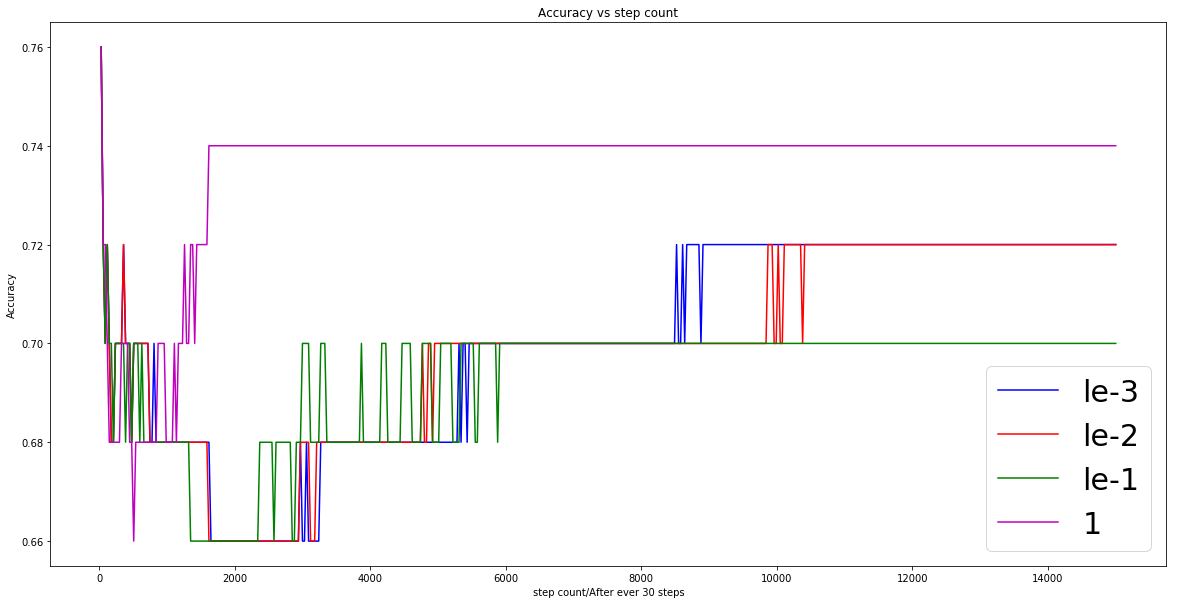

In [133]:

# Plot of the Accuracy vs  step count 





plt.figure(figsize=(20,10))


#le-3

X=list(range(30,15030,30))

plt.plot(X,accuracy_held_l1,'b',label='le-3')

#le-2

plt.plot(X,accuracy_held_l2,'r',label='le-2')

#le-1

plt.plot(X,accuracy_held_l3,'g',label='le-1')

#1

plt.plot(X,accuracy_held_l4,'m',label='1')
plt.ylabel("Accuracy")
plt.xlabel("step count/After ever 30 steps")
plt.title("Accuracy vs step count")



plt.legend(fontsize=30)
plt.show()



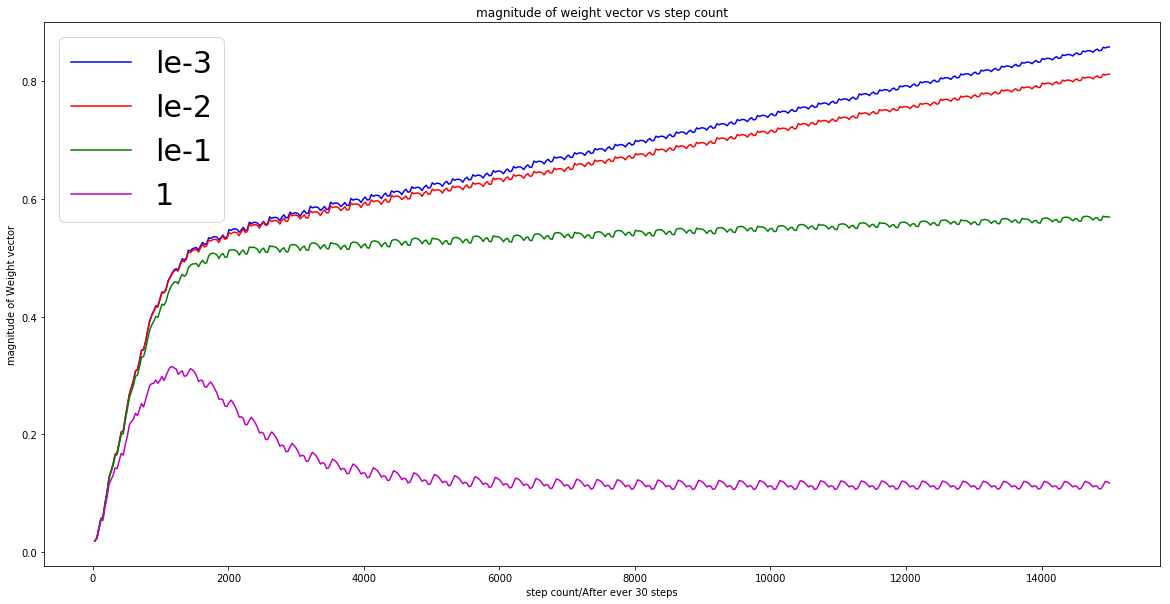

In [136]:

# Plot the Magnitude of Weight vector with different values of step count
#le-3
plt.figure(figsize=(20,10))
X=list(range(30,15030,30))

plt.plot(X,magnitude_held_l1,'b',label='le-3')

#le-2

plt.plot(X,magnitude_held_l2,'r',label='le-2')

#le-1

plt.plot(X,magnitude_held_l3,'g',label='le-1')

#1

plt.plot(X,magnitude_held_l4,'m',label='1')

plt.ylabel("magnitude of Weight vector")
plt.xlabel("step count/After ever 30 steps")
plt.title("magnitude of weight vector vs step count")
plt.legend(fontsize=30)
plt.show()



